In [2]:
#perform linear regression on Salary_Data dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Salary_Data.csv')
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [6]:
#Checking null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

#### Formula
   ##### Yi=f(Xi, \beta)+ei
Yi	=	dependent variable

f	=	function

Xi	=	independent variable

\beta	=	unknown parameters

ei	=	error terms

Estimated coefficients:
b_0 = 25792.200198668717         
b_1 = 9449.962321455072


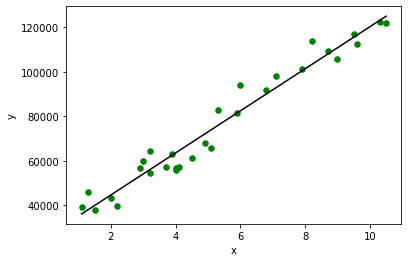

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "green",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "black")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array(df['YearsExperience'])
    y = np.array(df['Salary'])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \
        \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


In [ ]:
#caluclate MSE and R2 score

In [35]:
#perform linear regression on Salary_Data dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('traindata.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ways to fill in missing value:
1. Delete rows
2. Delete whole column
3. Replace with mean
4. Mode
5. Median
6. Forward fill
7. Backward fill
8. Interpolation using pandas
9. Filling regressive values - regression
10. KNN imputer
11. Replace with zero

In [37]:
cols = ['PassengerId','SibSp', 'Fare', 'Age']
newdf = df[cols]
newdf

,PassengerId,SibSp,Fare,Age
0,1,1,7.2500,22.0
1,2,1,71.2833,38.0
2,3,0,7.9250,26.0
3,4,1,53.1000,35.0
4,5,0,8.0500,35.0
...,...,...,...,...
886,887,0,13.0000,27.0
887,888,0,30.0000,19.0
888,889,1,23.4500,NaN
889,890,0,30.0000,26.0


In [38]:
##fill values using KNN

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
newdf = impute_knn.fit_transform(newdf)

In [33]:
newdf = pd.DataFrame(newdf, columns=['PassengerId','SibSp', 'Fare', 'Age'])
newdf

,PassengerId,SibSp,Fare,Age
0,1.0,1.0,7.2500,22.0
1,2.0,1.0,71.2833,38.0
2,3.0,0.0,7.9250,26.0
3,4.0,1.0,53.1000,35.0
4,5.0,0.0,8.0500,35.0
...,...,...,...,...
886,887.0,0.0,13.0000,27.0
887,888.0,0.0,30.0000,19.0
888,889.0,1.0,23.4500,29.0
889,890.0,0.0,30.0000,26.0


In [42]:
newdf = pd.DataFrame(newdf, columns=['PassengerId','SibSp', 'Fare', 'Age'])
newdf.isnull().sum()

PassengerId    0
SibSp          0
Fare           0
Age            0
dtype: int64

In [43]:
newdf = newdf.dropna(axis=0)
newdf.isnull().sum()

PassengerId    0
SibSp          0
Fare           0
Age            0
dtype: int64

In [24]:
newdf.merge(df, left_on='PassengerId', right_on='PassengerId')

,PassengerId,SibSp_x,Fare_x,Age_x,Survived,Pclass,Name,Sex,Age_y,SibSp_y,Parch,Ticket,Fare_y,Cabin,Embarked
0,1.0,1.0,7.2500,22.0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,71.2833,38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3.0,0.0,7.9250,26.0,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,53.1000,35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5.0,0.0,8.0500,35.0,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,13.0000,27.0,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888.0,0.0,30.0000,19.0,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889.0,1.0,23.4500,29.0,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890.0,0.0,30.0000,26.0,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
